## Study Task - Replication of the Mcd Case Study in Python

Task Description: From the perspective of McDonald’s, want to know if consumer segments exist that have a distinctly different image of McDonald’s. 

Why?
Understanding such systematic differences of brand perceptions by market segments informs which market segments to focus on, and what messages to communicate to them. 

Then...
We can choose to focus on market segments with a positive perception, and strengthen the positive perception. Or we can choose to focus on a market segment that currently perceives McDonald’s in a negative way. In this case, we want to understand the key drivers of the negative perception, and modify them.

### Step 1, 2 & 3

Preliminary market and organisational research

#### Step 2

Two possible attractiveness criteria: Positive - frequent customers, Negative - Consumers not fond of

The fast food data set - contains very little information beyond people’s brand image of McDonald’s

Hence, the following attractiveness criteria will be used: like McDonald’s and frequently eat at McDonald’s. 

These segment attractiveness criteria represent key information in Step 8 that informs target segment selection.

#### Step 3: Collected Data Set

1453 adult Australian consumer's qualitative binary perception (Y/N) of McD with respect to the following attributes:
YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING 

Additionally, consumer AGE, GENDER and VISIT FREQUENCY are present to contextualise responses with a consumer profile. 

### Step 4 Exploring the Data

In [1]:
# Step 4

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

import os

#from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('./mcd.csv')

In [3]:
print(f" Size = {data.size}")
print(f" Shape = {data.shape}")


 Size = 21795
 Shape = (1453, 15)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
print(pd.isnull(data).sum())

# no null

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [6]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
# Reveals - the segmentation variables (perception of McDonald’s) are verbal, not numeric
# Need to covert Verbal to Binary

Mcd_bin = data.iloc[:, 0:11]
Mcd_bin.shape

(1453, 11)

In [8]:
Mcd_bin.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [9]:
Mcd_bin = Mcd_bin.eq('Yes').mul(1)
round(Mcd_bin.mean(axis=0), 2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

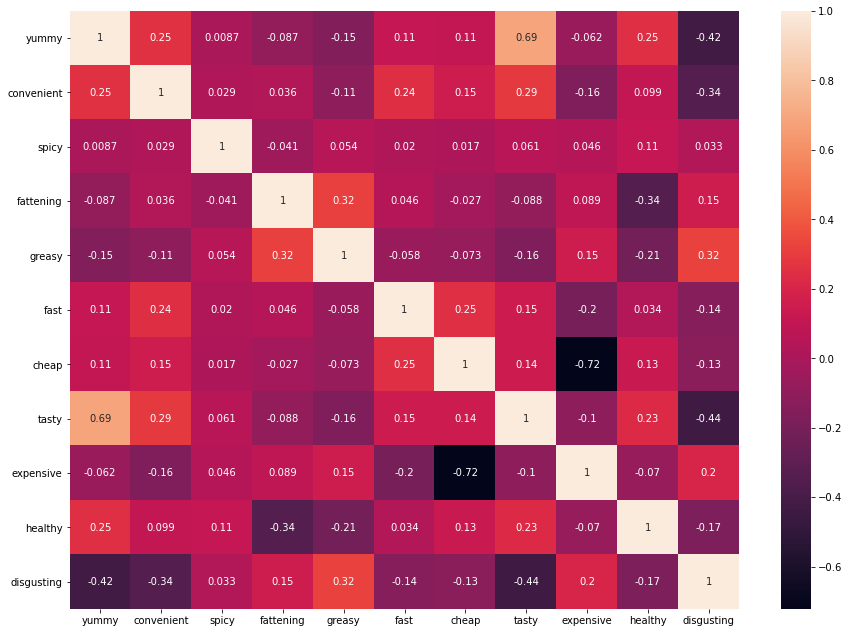

In [10]:
plt.figure(figsize=(15,11))
sns.heatmap(Mcd_bin.corr(), annot=True)
plt.show()

In [11]:
#Mcd_bin = StandardScaler().fit_transform(Mcd_bin)
pca = PCA(n_components=11)

principalComponents = pca.fit_transform(Mcd_bin)
component_names = [f"PC{i+1}" for i in range(Mcd_bin.shape[1])]

Mcd_pca = pd.DataFrame(data = principalComponents
             , columns = [component_names])

Mcd_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [12]:
Mcd_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
count,1.453000e+03,1453.000000,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,-2.689597e-17,0.000000,-6.785121e-17,4.034396e-17,1.833816e-17,-4.431723e-17,1.619871e-17,1.528180e-17,-5.165250e-17,8.007665e-17,-1.375362e-17
std,7.570495e-01,0.607456,5.046195e-01,3.987986e-01,3.374050e-01,3.102746e-01,2.896973e-01,2.751220e-01,2.652511e-01,2.488418e-01,2.369028e-01
min,-1.188421e+00,-1.040274,-8.808133e-01,-5.906209e-01,-1.045938e+00,-8.524911e-01,-8.059463e-01,-9.316201e-01,-9.557606e-01,-8.871971e-01,-8.851439e-01
25%,-5.476794e-01,-0.356848,-4.507793e-01,-2.814986e-01,-2.433247e-01,-1.927027e-01,-1.342190e-01,-1.717258e-01,-1.181233e-01,-1.465751e-01,-1.053163e-01
50%,-7.074592e-02,-0.115163,2.687734e-02,-1.163200e-01,3.348785e-02,-3.460184e-02,-6.366220e-02,-3.475619e-02,3.868061e-02,3.020635e-02,-1.201409e-02
75%,4.933012e-01,0.391554,3.515939e-01,2.702298e-01,2.048293e-01,1.747453e-01,2.318357e-02,1.295966e-01,7.987794e-02,7.001416e-02,8.554080e-02
max,1.705573e+00,1.279130,1.326976e+00,1.355278e+00,1.053327e+00,1.323793e+00,1.350886e+00,1.121388e+00,1.086693e+00,1.181524e+00,9.255829e-01


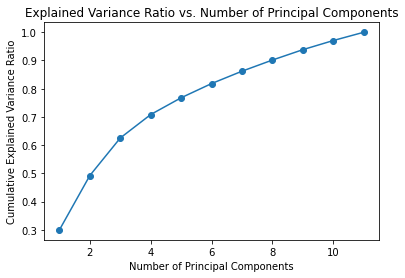

In [13]:
# Plot Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [14]:
cumulative_var_ratio

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [15]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns = component_names,  # the columns are the principal components
    index = Mcd_bin.columns,  # rows of the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


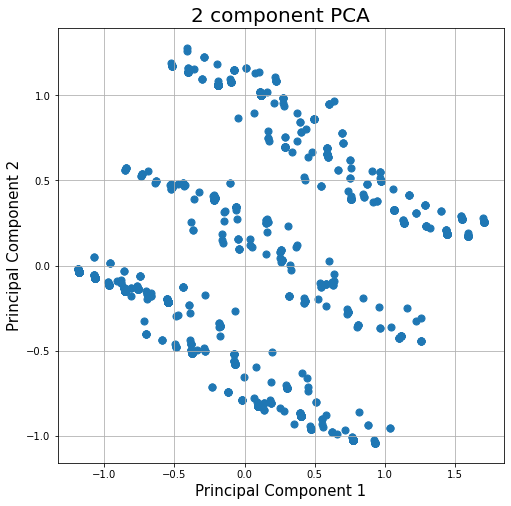

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(Mcd_pca.loc[:,'PC1']
           , Mcd_pca.loc[:,'PC2']
           , s = 50)
ax.grid()

In [17]:
loadings_2 = pca.components_[:2, :] * -1
loadings_2[1,0]

-0.3637897834887735

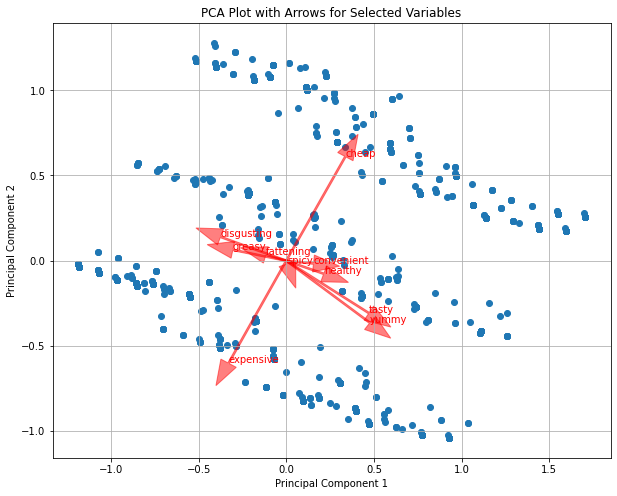

In [18]:

# Choose variables to display as arrows
selected_variables = [0,1,2,3,4,6,7,8,9,10]

fig = plt.figure(figsize = (10,8))

# Plot PCA scores
plt.scatter(principalComponents[:, 0], principalComponents[:, 1])

# Add arrows for selected variables
for i, var_index in enumerate(selected_variables):
    plt.arrow(0, 0, loadings_2[0, var_index], loadings_2[1, var_index],
              color='r', alpha=0.5, width=0.01, head_width=0.1)
    plt.text(loadings_2[0, var_index], loadings_2[1, var_index], f'{Mcd_bin.columns[var_index]}', color='r')

# Customize plot as needed
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Arrows for Selected Variables')
plt.grid(True)
plt.show()

### Step 5

#### 5.1 k-means

##### 5.1.1 k-means clustering

In [19]:
from sklearn.cluster import KMeans

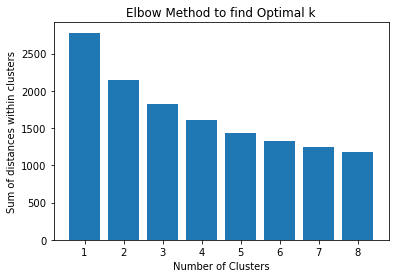

In [20]:
# Set seed for reproducibility
np.random.seed(1234)

# Create a range of clusters (2 to 8) and perform k-means clustering
cluster_range = range(1, 9)
inertia_values = []
Mcd_km = {}

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(Mcd_bin)
    inertia_values.append(kmeans.inertia_)
    Mcd_km[str(n_clusters)] = kmeans

    
#plot_range = range(1, 8)
# Plot the elbow method to determine the optimal number of clusters
plt.bar(cluster_range, inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of distances within clusters')
plt.title('Elbow Method to find Optimal k')
plt.show()


The decrease in values can be explained by the fact that more market segments factored imply that the segments size decreases and hence members are more similar (and therefore closer),

However there is no distinct elboe, i.e. there is no significant drop in the sum of distances within clusters. 

Therefore, this scree plot does not provide any useful input on the number of market segments to extract.



##### 5.1.2 Stability-based Analysis

In [21]:
# Global Stability

from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [22]:
# Convert DataFrame to NumPy array
Mcd_boot = Mcd_bin.to_numpy()

# Set the optimal number of clusters
optimal_k = 4

# Perform k-means clustering with the optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=1234)
final_kmeans.fit(Mcd_boot)

KMeans(n_clusters=4, n_init=10, random_state=1234)

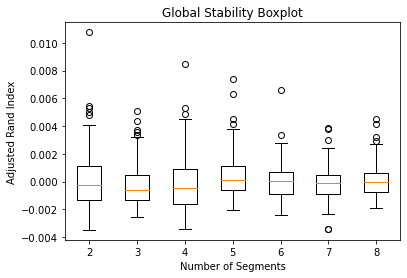

In [23]:
# Set seed for reproducibility
np.random.seed(1234)

# Number of bootstrap iterations
n_bootstrap = 100

# Number of clusters range
cluster_range = range(2, 9)

# Initialize an array to store adjusted Rand indices for each bootstrap iteration
rand_indices = np.zeros((n_bootstrap, len(cluster_range)))

# Perform bootstrap resampling and k-means clustering
for i in range(n_bootstrap):
    # Bootstrap sample
    bootstrap_sample = resample(Mcd_boot, random_state=np.random.randint(1, 1000), replace=True)

    # K-means clustering for each cluster number in the range
    for j, n_clusters in enumerate(cluster_range):
        kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state=1234)
        kmeans.fit(bootstrap_sample)
        predicted_labels = kmeans.labels_

        # Calculate adjusted Rand index
        rand_indices[i, j] = adjusted_rand_score(final_kmeans.labels_, predicted_labels)

# Plot the global stability boxplot
plt.boxplot(rand_indices, labels=[str(k) for k in cluster_range])
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')
plt.show()

In [24]:
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

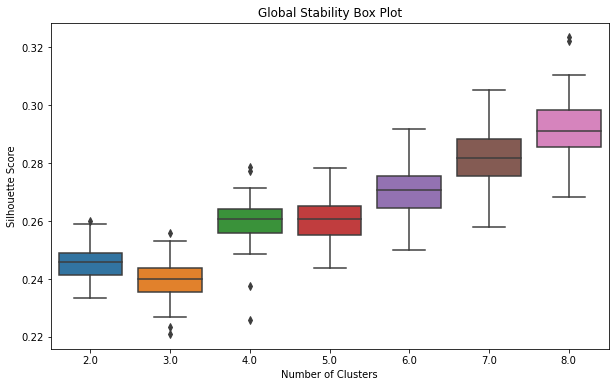

In [25]:
np.random.seed(1234)

cluster_range = range(2, 9)

# Number of bootstrap iterations
n_bootstrap = 100

# Initialize a list to store silhouette scores for each cluster number
silhouette_scores_list = []

# Perform bootstrap resampling and silhouette analysis
for n_clusters in cluster_range:
    silhouette_vals = np.zeros((n_bootstrap,))
    
    for i in range(n_bootstrap):
        # Bootstrap sample
        bootstrap_sample = resample(Mcd_boot, random_state=np.random.randint(1, 1000), replace=True)

        # K-means clustering for the current cluster number
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        kmeans.fit(bootstrap_sample)
        predicted_labels = kmeans.labels_

        # Calculate silhouette score
        silhouette_vals[i] = silhouette_score(bootstrap_sample, predicted_labels)

    # Store the silhouette scores for the current cluster number
    silhouette_scores_list.append(silhouette_vals)

# Create a DataFrame for seaborn boxplot
df_silhouette_scores = pd.DataFrame(np.column_stack([np.repeat(cluster_range, n_bootstrap), np.concatenate(silhouette_scores_list)]), columns=['Number of Clusters', 'Silhouette Score'])

# Plot the global stability box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number of Clusters', y='Silhouette Score', data=df_silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Global Stability Box Plot')
plt.show()


In [26]:
from sklearn.metrics import adjusted_rand_score

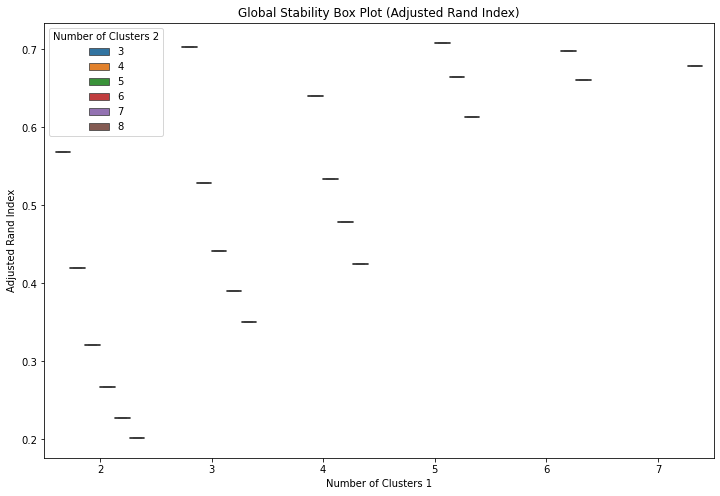

In [27]:
np.random.seed(1234)

# Define the range of clusters
cluster_range = range(2, 9)

# Number of bootstrap iterations
n_bootstrap = 100

# Initialize a list to store adjusted Rand indices for each pair of cluster numbers
adjusted_rand_indices_list = []

# Perform bootstrap resampling and adjusted Rand index analysis
for i, n_clusters_1 in enumerate(cluster_range):
    for j, n_clusters_2 in enumerate(cluster_range):
        if j <= i:  # Avoid redundant computations (e.g., avoid computing 2 vs 3 and then 3 vs 2)
            continue

        adjusted_rand_indices = []

        for k in range(n_bootstrap):
            # Bootstrap sample
            bootstrap_sample = resample(Mcd_boot, random_state=np.random.randint(1, 1000), replace=True)

            # K-means clustering for the current cluster numbers
            kmeans_1 = KMeans(n_clusters=n_clusters_1, n_init=10, random_state=1234)
            kmeans_2 = KMeans(n_clusters=n_clusters_2, n_init=10, random_state=1234)
            kmeans_1.fit(bootstrap_sample)
            kmeans_2.fit(bootstrap_sample)

            # Calculate adjusted Rand index
            adjusted_rand_indices.append(adjusted_rand_score(kmeans_1.labels_, kmeans_2.labels_))

        # Store the adjusted Rand indices for the current pair of cluster numbers
        adjusted_rand_indices_list.append((n_clusters_1, n_clusters_2, np.mean(adjusted_rand_indices)))

# Create a DataFrame for seaborn boxplot
df_adjusted_rand_indices = pd.DataFrame(adjusted_rand_indices_list, columns=['Number of Clusters 1', 'Number of Clusters 2', 'Adjusted Rand Index'])

# Plot the global stability box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Number of Clusters 1', y='Adjusted Rand Index', hue='Number of Clusters 2', data=df_adjusted_rand_indices)
plt.xlabel('Number of Clusters 1')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Box Plot (Adjusted Rand Index)')
plt.legend(title='Number of Clusters 2')
plt.show()

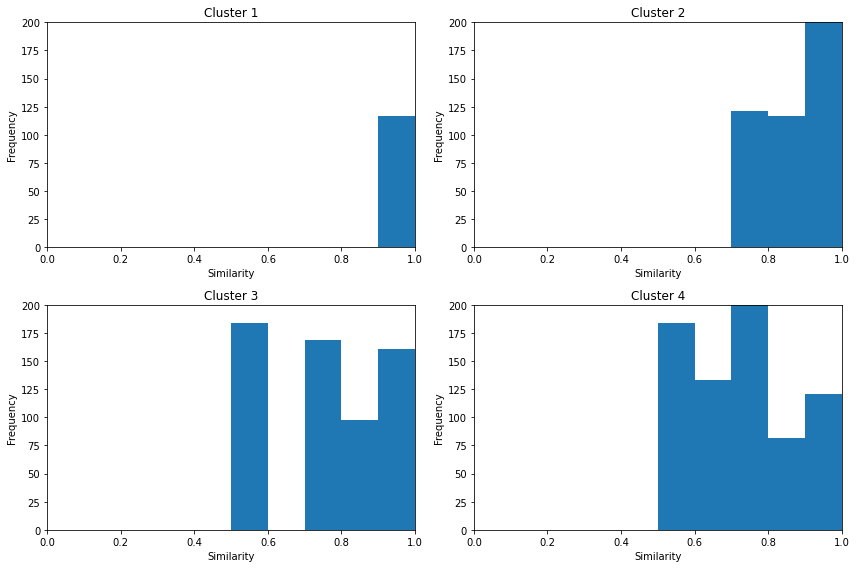

In [28]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(1, 5):
    labels = Mcd_km[str(i)].predict(Mcd_bin)
    similarities = Mcd_km[str(i)].transform(Mcd_bin).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('Cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

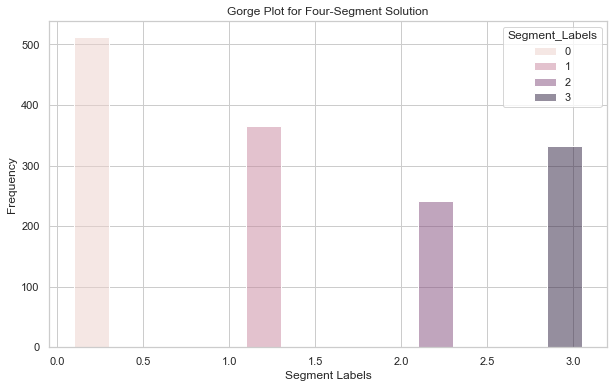

In [29]:
labels_four_segment = final_kmeans.labels_
data_with_labels = pd.DataFrame({'Segment_Labels': labels_four_segment, 'Feature_1': Mcd_boot[:, 0], 'Feature_2': Mcd_boot[:, 1], 'Feature_3': Mcd_boot[:, 2],'Feature_4': Mcd_boot[:, 4]})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a gorge plot
plt.figure(figsize=(10, 6))
sns.histplot(data_with_labels, x="Segment_Labels", hue="Segment_Labels", shrink=0.8)
plt.title('Gorge Plot for Four-Segment Solution')
plt.xlabel('Segment Labels')
plt.ylabel('Frequency')
plt.show()

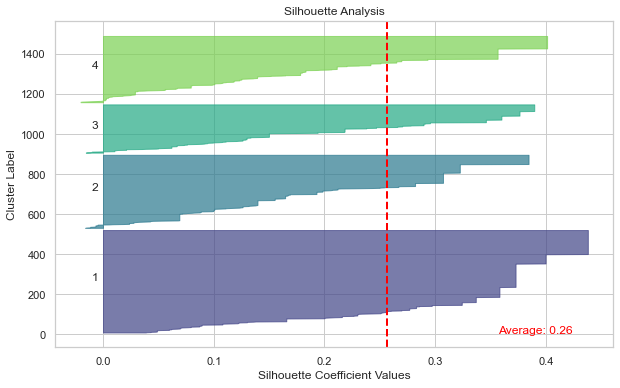

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming 'final_kmeans' is your k-means clustering result, replace it with your actual result
# In this example, 'final_kmeans' is a placeholder for your clustering result

# Extract cluster labels from the k-means result
cluster_labels = final_kmeans.labels_

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(Mcd_bin, cluster_labels)

# Compute the overall silhouette score
average_silhouette = silhouette_score(Mcd_bin, cluster_labels)

# Create a SLSA plot
plt.figure(figsize=(10, 6))

# Plot silhouette values for each sample
y_lower = 10
for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()

    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = sns.color_palette('viridis', optimal_k)[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.01, y_lower + 0.5 * size_cluster_i, str(i+1))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

# Add a vertical line for the average silhouette score
plt.axvline(x=average_silhouette, color="red", linestyle="--", linewidth=2)

# Annotate the average silhouette score
plt.text(average_silhouette + 0.1, 0.5, f'Average: {average_silhouette:.2f}', color="red")

# Set labels and title
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.title("Silhouette Analysis")

plt.show()


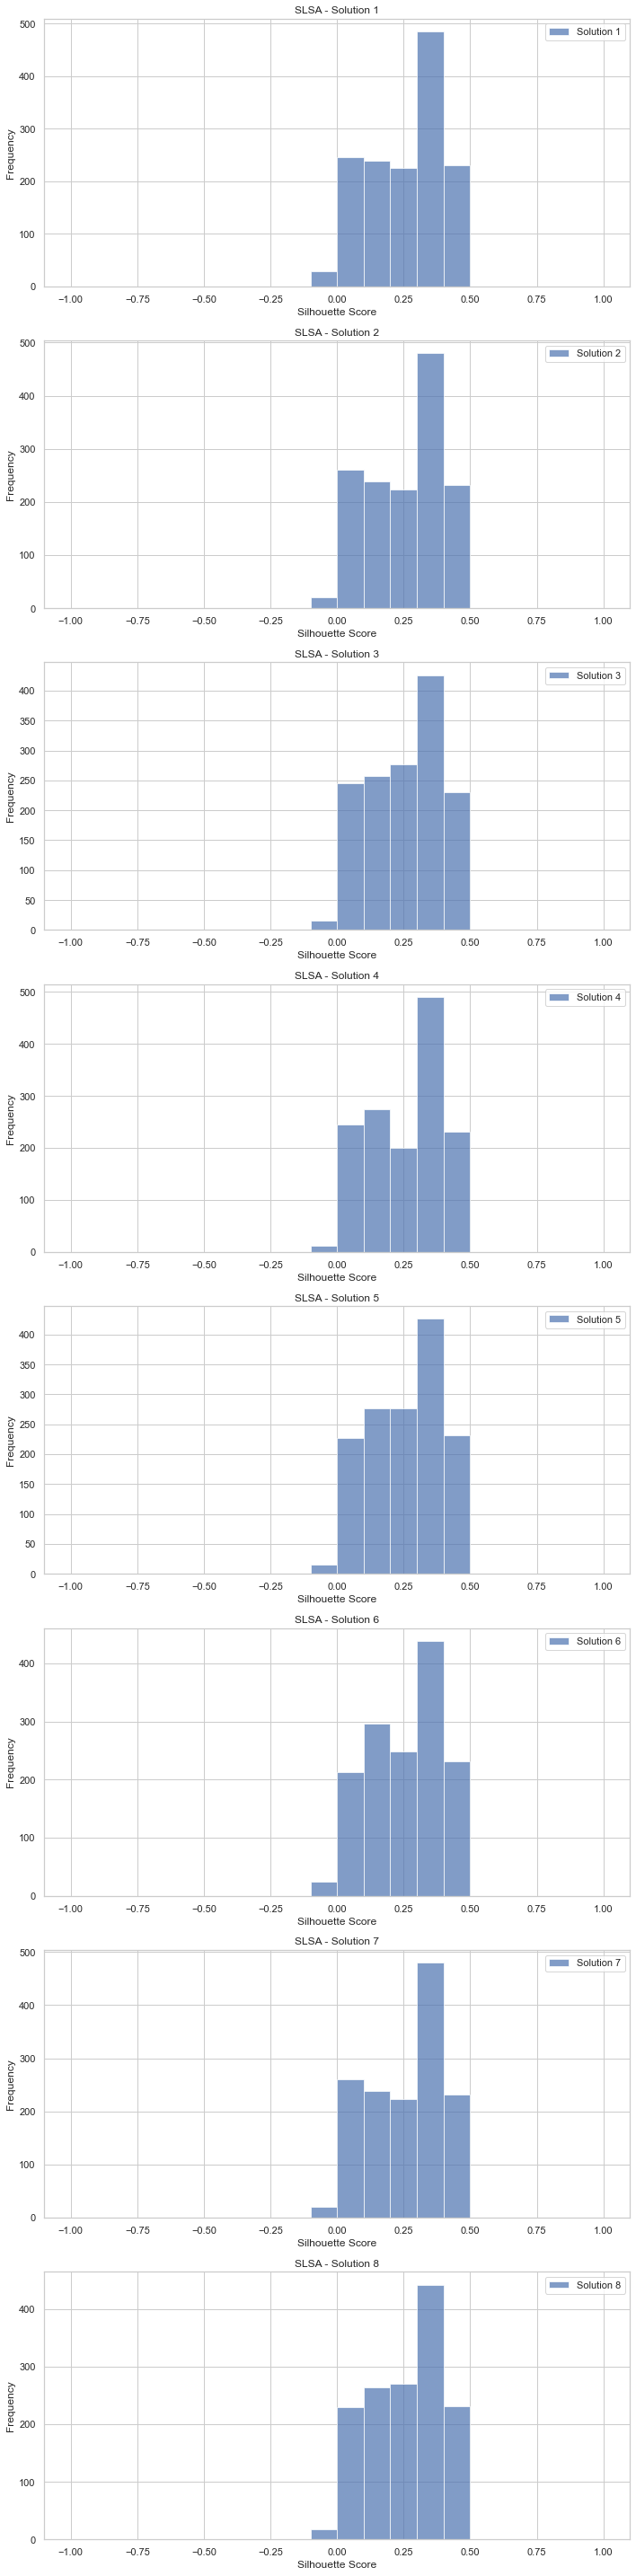

In [32]:
# Number of clustering solutions
n_solutions = 8  # Change this based on your specific scenario

# Create a subplot for each solution
fig, axes = plt.subplots(n_solutions, 1, figsize=(10, 5 * n_solutions))

# Iterate over different clustering solutions
for solution_idx in range(n_solutions):
    # Assuming you have a function to generate different solutions, replace this with your own logic
    # Here, we'll simply fit k-means with a different random state for each solution
    kmeans_solution = KMeans(n_clusters=optimal_k, n_init=10, random_state=solution_idx)
    kmeans_solution.fit(Mcd_boot)
    
    # Compute silhouette scores for each data point in the current solution
    silhouette_vals = silhouette_samples(Mcd_boot, kmeans_solution.labels_)

    # Plot SLSA for the current solution
    axes[solution_idx].hist(silhouette_vals, bins=np.arange(-1, 1.1, 0.1), alpha=0.7, label=f'Solution {solution_idx + 1}')
    axes[solution_idx].set_title(f'SLSA - Solution {solution_idx + 1}')
    axes[solution_idx].set_xlabel('Silhouette Score')
    axes[solution_idx].set_ylabel('Frequency')
    axes[solution_idx].legend()

plt.tight_layout()
plt.show()


In [33]:
from sklearn.mixture import GaussianMixture

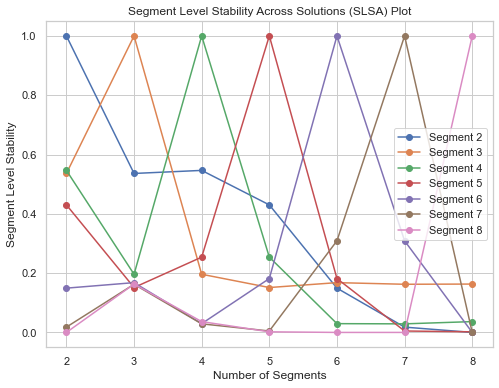

In [34]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = Mcd_km[str(segment)].predict(Mcd_bin)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

In [35]:
from scipy.stats import entropy

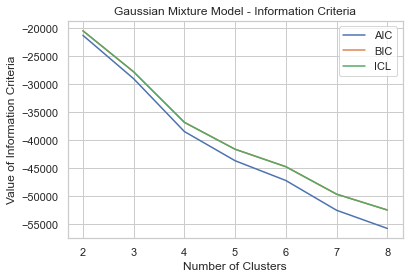

In [37]:
# Set seed for reproducibility
np.random.seed(1234)

# Define the range of clusters
cluster_range = range(2, 9)

# Number of repetitions
n_rep = 10

# Initialize a list to store information criteria values for each cluster number
aic_values = []
bic_values = []
icl_values = []

# Function to calculate the entropy of classification
def classification_entropy(model, data):
    probs = model.predict_proba(data)
    entropy_val = entropy(probs)
    return entropy_val

Criteria_results = []

# Perform Gaussian Mixture Model analysis
for n_clusters in cluster_range:
    aic_vals = []
    bic_vals = []
    icl_vals = []

    for _ in range(n_rep):
        # Fit the Gaussian Mixture Model
        model = GaussianMixture(n_components=n_clusters, n_init=10, random_state=np.random.randint(1, 1000))
        model.fit(Mcd_boot)

        # Append information criteria values
        aic_vals.append(model.aic(Mcd_boot))
        bic_vals.append(model.bic(Mcd_boot))
        entropy_val = classification_entropy(model, Mcd_boot)
        icl_vals.append(model.bic(Mcd_boot) - entropy_val)
        Criteria_results.append({
            "iter": model.n_iter_,
            "converged": model.converged_,
            "k": k,
            "logLik": model.score(Mcd_boot) * len(Mcd_boot),  # Total log-likelihood
            "AIC": aic_vals[_],
            "BIC": bic_vals[_],
            "ICL": np.mean(icl_vals[_])
        })

    # Store the average values for each cluster number
    aic_values.append(np.mean(aic_vals))
    bic_values.append(np.mean(bic_vals))
    icl_values.append(np.mean(icl_vals))

# Plot the information criteria values
plt.plot(cluster_range, aic_values, label='AIC')
plt.plot(cluster_range, bic_values, label='BIC')
plt.plot(cluster_range, icl_values, label='ICL')
plt.xlabel('Number of Clusters')
plt.ylabel('Value of Information Criteria')
plt.title('Gaussian Mixture Model - Information Criteria')
plt.legend()
plt.show()

In [38]:
# Convert to DataFrame for display
Criteria_df = pd.DataFrame(Criteria_results)

Criteria_df.head()

,iter,converged,k,logLik,AIC,BIC,ICL
0,5,True,99,11147.820925,-21985.641850,-21167.027072,-21173.547627
1,7,True,99,11147.820925,-21985.641850,-21167.027072,-21173.547627
2,5,True,99,11147.820925,-21985.641850,-21167.027072,-21173.547627
3,8,True,99,11147.820925,-21985.641850,-21167.027072,-21173.547627
4,6,True,99,7572.324062,-14834.648124,-14016.033346,-14022.619532


#### Step 5.3

In [39]:
pd.value_counts(data['Like'])

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [40]:
mcd_reg = data.replace("I hate it!-5",-5).replace("I love it!+5",5)

In [41]:
pd.value_counts(mcd_reg['Like'])

+3    229
+2    187
0     169
+4    160
+1    152
-5    152
5     143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [42]:
mcd_reg['Like']=pd.to_numeric(mcd_reg['Like'])

In [43]:
pd.value_counts(mcd_reg['Like'])

 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [44]:
from patsy import dmatrices

# Extracting the variables
predictor_columns = mcd_reg.columns[:11]

# Create the formula string
formula_string = "Like ~ " + " + ".join(predictor_columns)

# Create the formula object
formula = dmatrices(formula_string, mcd_reg)[1]

# Print the formula
print(formula)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [45]:
from patsy import dmatrix

# Set seed for reproducibility
np.random.seed(1234)

# Fit a Gaussian Mixture Model with 2 components
n_components = 2
gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
Mcd_reg2 = gmm.fit(formula)

print(Mcd_reg2)

# Display the cluster sizes
print("Cluster sizes:")
for i in range(n_components):
    print(f"{i + 1}: {np.sum(gmm.predict(formula) == i)}")

# Display the convergence information
print(f"Convergence after {gmm.n_iter_} iterations")


GaussianMixture(n_components=2, n_init=10, random_state=1234)
Cluster sizes:
1: 468
2: 985
Convergence after 7 iterations


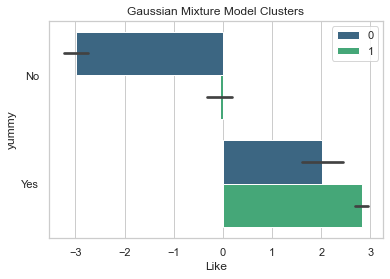

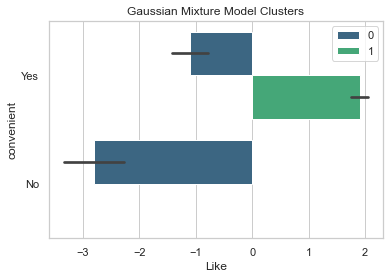

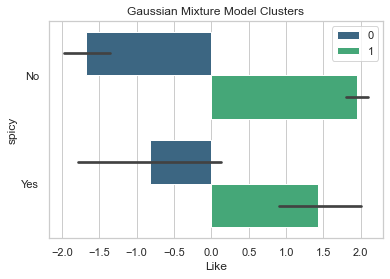

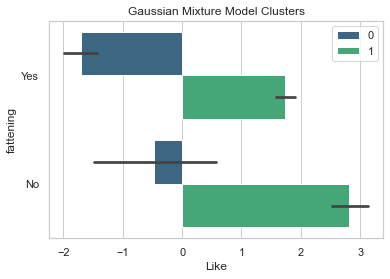

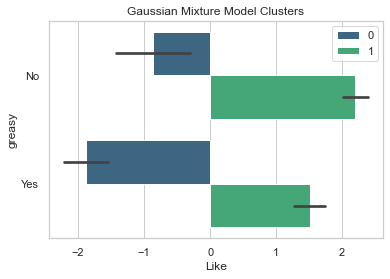

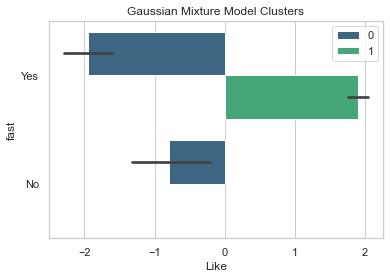

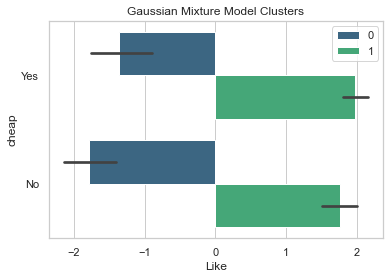

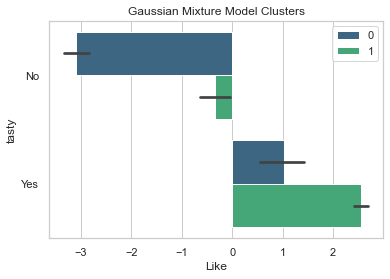

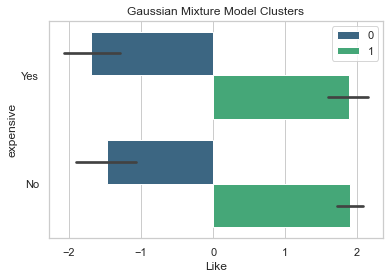

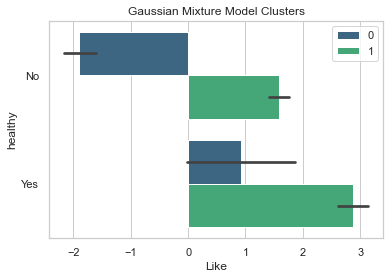

In [46]:
# Fit a Gaussian Mixture Model with 2 components
n_components = 2
gmm_refit = GaussianMixture(n_components=n_components, n_init=1, random_state=1234)
gmm_refit.weights_ = gmm.weights_
gmm_refit.means_ = gmm.means_
gmm_refit.covariances_ = gmm.covariances_
gmm_refit.fit(formula)

# Plot the data points
for i in range(10):
    sns.barplot(x='Like', y=mcd_reg.columns[i], data=mcd_reg, hue=gmm_refit.predict(formula), palette='viridis')
    plt.title('Gaussian Mixture Model Clusters')
    plt.show()

### Step 6

In [47]:
# Extract the clustering result for the 4-segment solution
Mcd_k4 = Mcd_km['4']


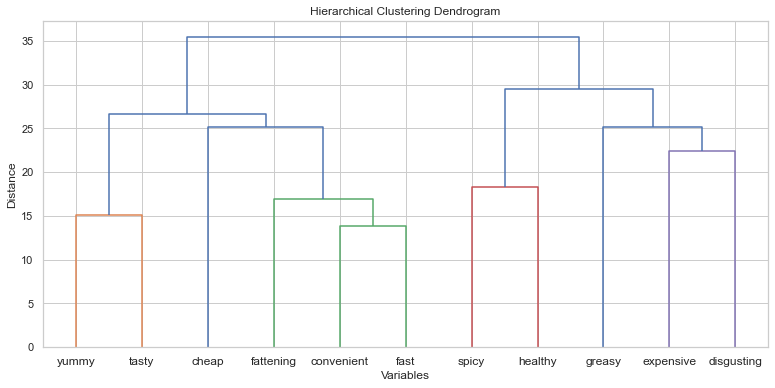

In [48]:
from scipy.cluster.hierarchy import linkage, dendrogram


# Perform hierarchical clustering
Mcd_vclust = linkage(Mcd_bin.transpose(), method='complete', metric='euclidean')

# Create the dendrogram
plt.figure(figsize=(13, 6))
dendrogram(Mcd_vclust, orientation='top', labels=Mcd_bin.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()

In [49]:
# Getting the size of each cluster
cluster_sizes = pd.Series(kmeans.labels_).value_counts().sort_index()

In [50]:
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
df = pd.DataFrame(Mcd_bin, index=clusters)
df.index = [f'{cluster}: {size} ({size/sum(cluster_sizes):.0%})' for cluster, size in zip(clusters, cluster_sizes)]
df.index 

Index(['Cluster 1: 254 (17%)', 'Cluster 2: 130 (9%)', 'Cluster 3: 214 (15%)',
       'Cluster 4: 141 (10%)'],
      dtype='object')

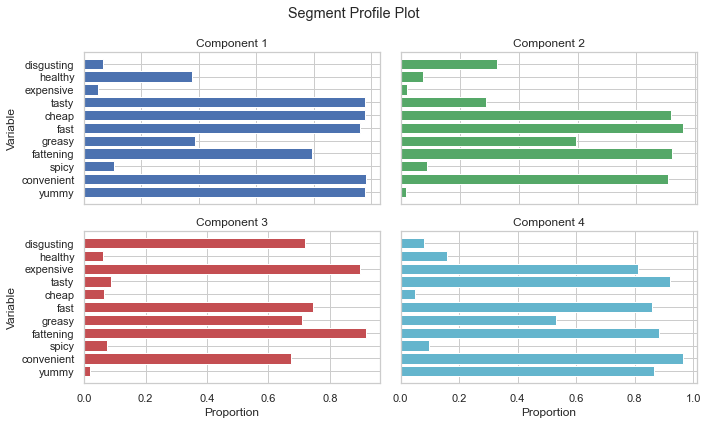

In [51]:
Mcd_mean = Mcd_bin.groupby(Mcd_k4.labels_).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(Mcd_mean.shape[1]), Mcd_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(Mcd_mean.shape[1]), Mcd_mean.iloc[1], color = 'g')
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(Mcd_mean.shape[1]), Mcd_mean.iloc[2], color = 'r')
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(Mcd_mean.shape[1]), Mcd_mean.iloc[3], color = 'c')
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(Mcd_mean.shape[1]))
    ax.set_yticklabels(Mcd_bin.columns)
    ax.label_outer()

fig.suptitle('Segment Profile Plot')
fig.tight_layout()
plt.show()

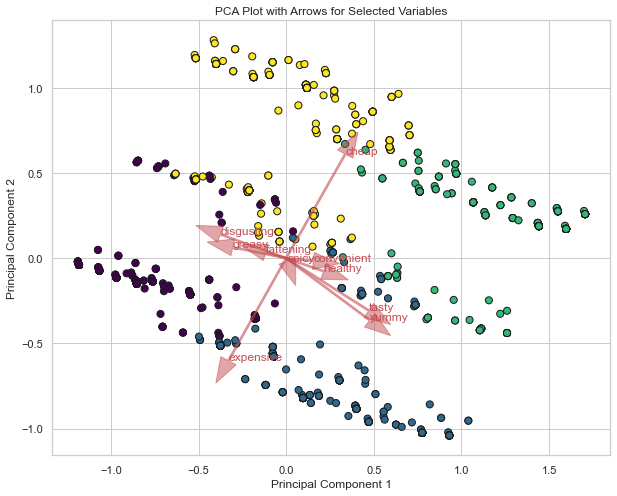

In [52]:
fig = plt.figure(figsize = (10,8))

# Plot PCA scores
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=Mcd_k4.labels_, cmap='viridis', edgecolors='k', s=50)

# Add arrows for selected variables
for i, var_index in enumerate(selected_variables):
    plt.arrow(0, 0, loadings_2[0, var_index], loadings_2[1, var_index],
              color='r', alpha=0.5, width=0.01, head_width=0.1)
    plt.text(loadings_2[0, var_index], loadings_2[1, var_index], f'{Mcd_bin.columns[var_index]}', color='r')

# Customize plot as needed
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Arrows for Selected Variables')
plt.grid(True)
plt.show()

### Step 7

<Figure size 3600x3600 with 0 Axes>

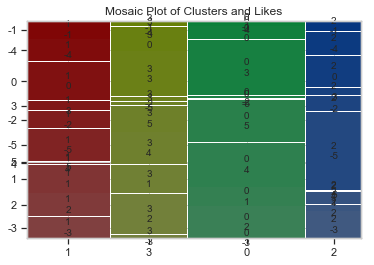

In [53]:
from statsmodels.graphics.mosaicplot import mosaic

# Get the cluster labels from KMeans
k4 = Mcd_k4.labels_

# Create a DataFrame with cluster labels and the 'Like' variable
df_cluster_like = pd.DataFrame({'Cluster': k4, 'Like': mcd_reg['Like']})

# Create a mosaic plot
plt.figure(figsize=(50, 50))
mosaic(df_cluster_like, ['Cluster', 'Like'], title='Mosaic Plot of Clusters and Likes')
plt.show()

<Figure size 720x432 with 0 Axes>

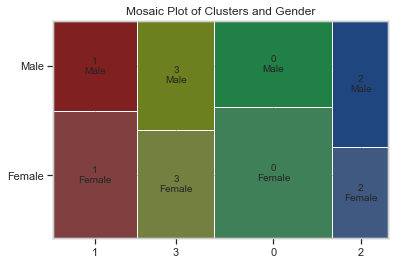

In [54]:
# Create a DataFrame with cluster labels and the 'Gender' variable
df_cluster_gender = pd.DataFrame({'Cluster': k4, 'Gender': data['Gender']})

# Create a mosaic plot
plt.figure(figsize=(10, 6))
mosaic(df_cluster_gender, ['Cluster', 'Gender'], title='Mosaic Plot of Clusters and Gender')
plt.show()


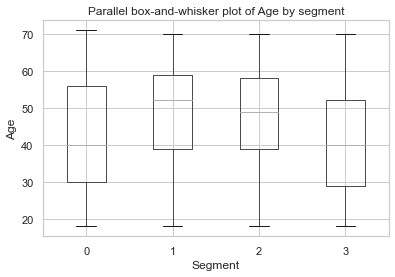

In [55]:
# creating box plot 
df_cluster_age = pd.DataFrame({'Segment': k4, 'Age': data['Age']})
df_cluster_age.boxplot(by='Segment', column='Age')
plt.ylabel('Age')
plt.title('Parallel box-and-whisker plot of Age by segment')
plt.suptitle('')
plt.show()

### Step 8

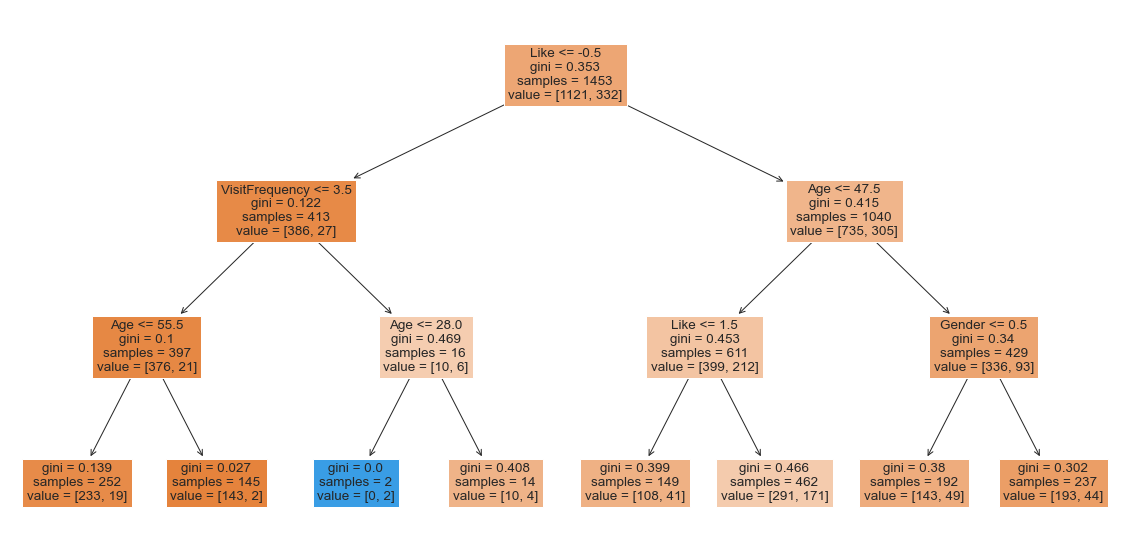

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
new_data = pd.read_csv('./mcd.csv')
# Preparing the data
df_tree = mcd_reg
# Mapping the 'VisitFrequency' column to an ordinal scale
ordinal_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}

# Applying the mapping to the dataset
df_tree['VisitFrequency'] = new_data['VisitFrequency'].map(ordinal_mapping)

#female =1 , male=0
df_tree['Gender'] = (df_tree['Gender'] == 'Female').astype(int)

X = df_tree[['Like', 'Age', 'VisitFrequency', 'Gender']]
y = (k4 == 3).astype(int) 

tree = DecisionTreeClassifier(max_depth=3)

tree.fit(X, y)

# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns.tolist())
plt.show()

Accuracy: 0.41237113402061853


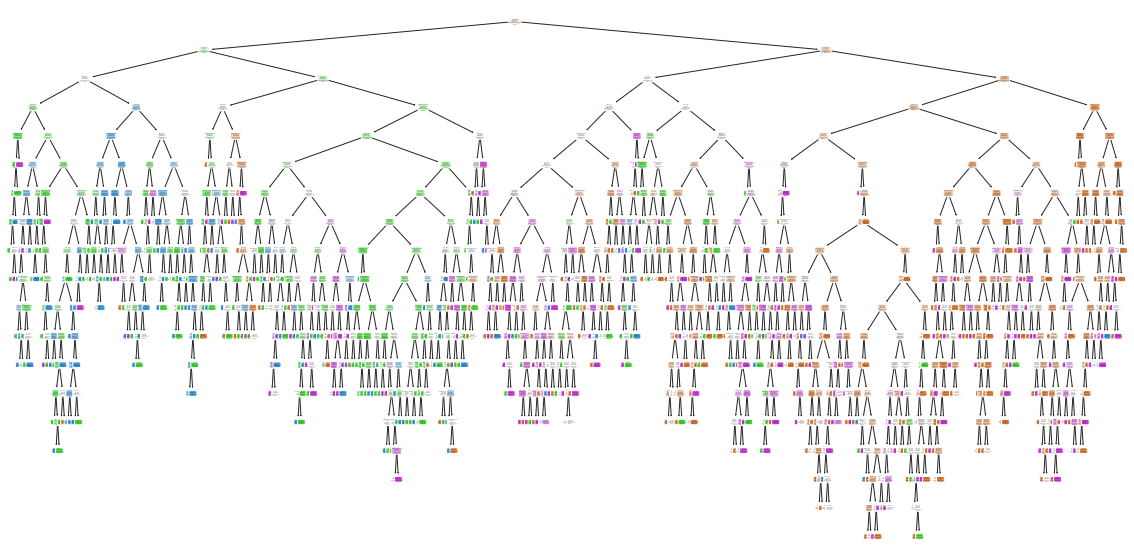

In [57]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

# Create a DataFrame with cluster labels and the relevant variables
df_cluster_variables = pd.DataFrame({
    'Cluster': k4,
    'Like.n': mcd_reg['Like'],
    'Age': new_data['Age'],
    'VisitFrequency': df_tree['VisitFrequency'],
    'Gender': new_data['Gender']
})

# Encode categorical variables if needed
label_encoder = preprocessing.LabelEncoder()
df_cluster_variables['Gender'] = label_encoder.fit_transform(df_cluster_variables['Gender'])

# Split the data into features and target
X = df_cluster_variables.drop('Cluster', axis=1)
y = df_cluster_variables['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred = tree_model.predict(X_test)

# Print accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=df_cluster_variables['Cluster'].astype(str), rounded=True)
plt.show()

In [58]:
# Create a DataFrame with 'MD.k4' and 'VisitFrequency'
df_cluster = pd.DataFrame({'Cluster': k4, 'VisitFrequency': df_tree['VisitFrequency'], 'Female': (data['Gender'] == 'Female').astype(int), 'Like': mcd_reg['Like']})

# Calculate the mean VisitFrequency for each cluster
visit_means = df_cluster.groupby('Cluster')['VisitFrequency'].mean()

print(visit_means)


Cluster
0    3.019493
1    1.685792
2    1.417355
3    2.873494
Name: VisitFrequency, dtype: float64


In [59]:
like_means = df_cluster.groupby('Cluster')['Like'].mean()

print(like_means)


Cluster
0    2.920078
1   -1.218579
2   -2.652893
3    2.165663
Name: Like, dtype: float64


In [60]:
# Calculate the mean of binary encoding for 'Female' for each cluster
female_means = df_cluster.groupby('Cluster')['Female'].mean()

print(female_means)

Cluster
0    0.602339
1    0.581967
2    0.417355
3    0.496988
Name: Female, dtype: float64


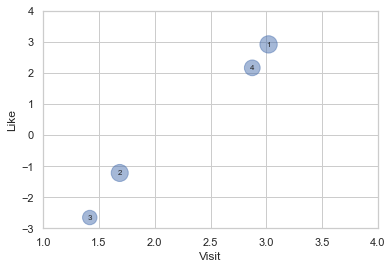

In [61]:
# Create scatter plot
plt.scatter(visit_means, like_means, s=500 * female_means, alpha=0.5)

# Set plot limits
plt.xlim(1, 4)
plt.ylim(-3, 4)

# Add labels to data points
for i, label in enumerate(range(1, 5)):
    plt.text(visit_means[i], like_means[i], str(label), fontsize=8, ha='center', va='center')

# Add labels to axes
plt.xlabel('Visit')
plt.ylabel('Like')

# Show the plot
plt.show()
